# Fourier Transform

A small notebook to demonstrate the DFT of a sampled signal f(x)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
# print(default_color)

In [9]:
def f(x):
    return 1.5 * np.cos(x) + 0.25 * np.sin(x) + 2 * np.sin(2*x) + np.sin(3*x)

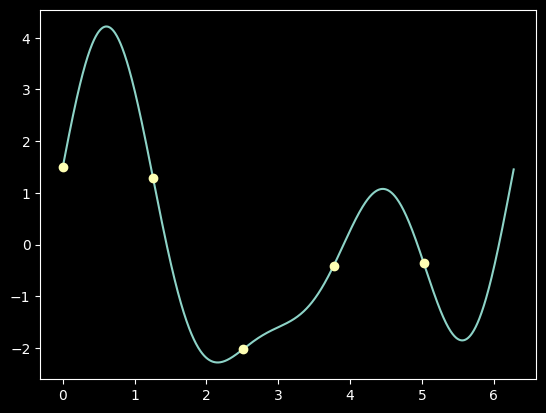

In [10]:
N_SAMPLES = 5
N_SAMPLES_NYQUIST = 2 * 3 +1 # because 3 is the highest frequency

x_points = np.linspace(0, 2*np.pi, N_SAMPLES, endpoint=False)
x_points_nyquist = np.linspace(0, 2*np.pi, N_SAMPLES_NYQUIST, endpoint=False)

x_curve = np.linspace(0, 2*np.pi, 1000, endpoint=False)


plt.style.use('seaborn-whitegrid')

plt.plot(x_curve, f(x_curve))
plt.plot(x_points, f(x_points), 'o')

In [11]:
# Take the Fourier transform of the function
fhat = np.fft.fft(f(x_points))

# Output the Fourier transform as a table pandas DataFrame
df = pd.DataFrame({
    'f(x)': f(x_points),
    'dft': [f"{real:.2f} + {imag:.2f}i" for real, imag in zip(fhat.real, fhat.imag)],
})

df.T

,0,1,2,3,4
f(x),1.5,1.289075,-2.017636,-0.409415,-0.362024
dft,0.00 + 0.00i,3.75 + -0.63i,-0.00 + -2.50i,-0.00 + 2.50i,3.75 + 0.63i


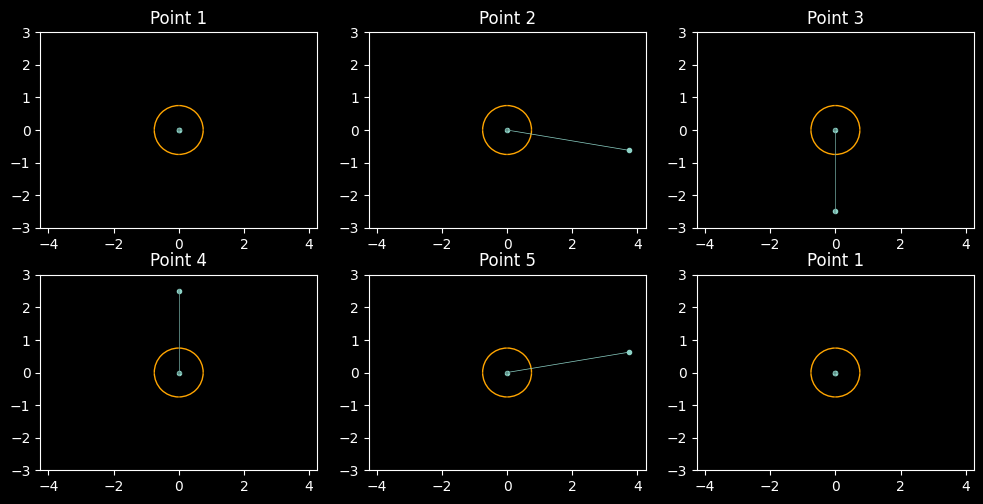

In [12]:
# Plotting the unit circles
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
padding = 0.5
# fig.dpi = 360

# Adjusting the points to include the first point twice
reals =  list(fhat.real[0:]) + [fhat.real[0]]
imags =  list(fhat.imag[0:]) + [fhat.imag[0]]

for idx, ax in enumerate(axes.ravel()): 
    real = reals[idx] if idx < len(reals) else fhat.real[0]
    imag = imags[idx] if idx < len(imags) else fhat.imag[0]

    ax.plot([0, real], [0, imag], 'o-', linewidth=0.5, markersize=3)
    
    ax.set_xlim(-max(abs(fhat.real)) - padding, max(abs(fhat.real)) + padding)
    ax.set_ylim(-max(abs(fhat.imag)) - padding, max(abs(fhat.imag)) + padding)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black',linewidth=0.25)
    ax.axvline(0, color='black',linewidth=0.25)
    circle = plt.Circle((0, 0), 0.75, color='orange', fill=False)
    ax.add_artist(circle)
    ax.set_title(f'Point {(idx % 5) + 1}')

plt.tight_layout()
plt.show()


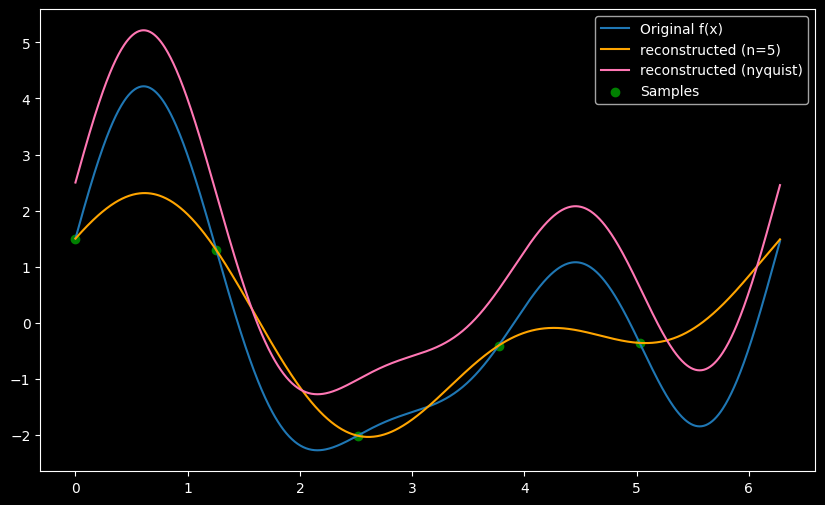

In [13]:

# Take the Fourier transform of the function
fhat = np.fft.fft(f(x_points))
fhat_nyquist = np.fft.fft(f(x_points_nyquist))

# Kontinuierliche Rekonstruktion
def reconstructed_continuous(x, fhat=fhat):
    result = np.zeros_like(x, dtype=np.complex128)
    N = len(fhat)
    for n in range(N):
        freq = n / (2*np.pi) if n <= N//2 else (n - N) / (2*np.pi)
        result += fhat[n] * np.exp(1j * 2 * np.pi * freq * x)
    return result.real / N



plt.figure(figsize=(10,6))
# Plot der Abtastpunkte


plt.plot(x_curve, f(x_curve), label='Original f(x)', color='#1f77b4')
plt.plot(x_curve, reconstructed_continuous(x_curve, fhat=fhat), label='reconstructed (n=5)', color='orange')
plt.plot(x_curve, reconstructed_continuous(x_curve,fhat=fhat_nyquist) +1, label='reconstructed (nyquist)', color='#ff77b4')
plt.scatter(x_points, f(x_points), label='Samples', color='green')

plt.legend()
# plt.xlabel('x')
# plt.ylabel('Amplitude')
# plt.grid(True)
plt.show()

NameError: name 'T' is not defined

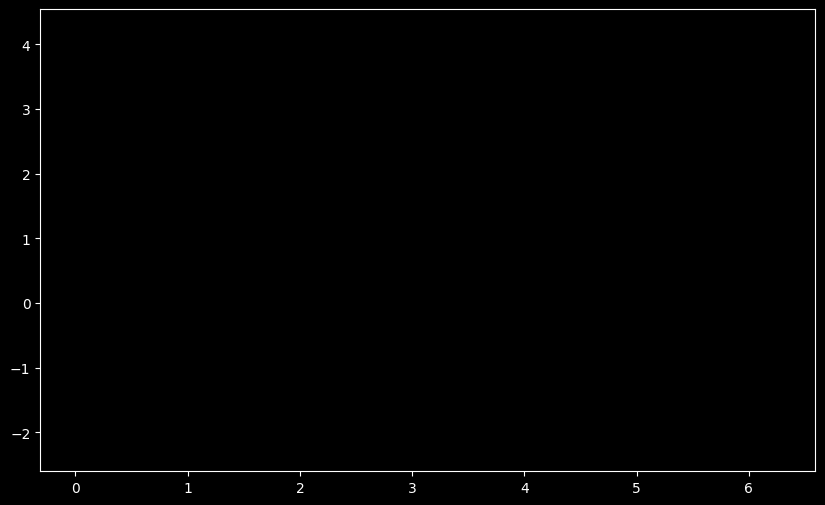

In [14]:
plt.figure(figsize=(10,6))

# Plotting the original function
plt.plot(x_curve, f(x_curve), label='Original f(x)', linewidth=2, color='black')

for n in range(1, N_SAMPLES):
    freq = n / T
    coeff = fhat[n]
    y_single = (coeff * np.exp(1j * 2 * np.pi * freq * x_curve)).real
    
    plt.plot(x_curve, y_single, label=f'Freq: {freq:.2f} Hz')

plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Einzelne Schwingungen aus FFT')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
